In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msn
from scipy.stats import norm, probplot

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

In [2]:
train.head()


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd        NaN   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Variables Types



#### 1. Numerical Variables

In [6]:
# Numeric data is divided into two main types
# Continuous Variables and Discrete Variables

numerical_feature = [feature for feature in train.columns if train[feature].dtypes != 'O']
tnumerical_feature = [feature for feature in test.columns if test[feature].dtypes != 'O']
print("")
print('NUMBER OF NUMERICAL VARIABLES : ', len(numerical_feature))
print("")

train[numerical_feature].head()


NUMBER OF NUMERICAL VARIABLES :  38



Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

#### Datetime Variables


In [7]:
# There are 4 year variables
# You can easily find year variables by looking at them one by one, or you can also use a logical like below
year_feature = [feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature]
tyear_feature = [feature for feature in tnumerical_feature if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [8]:
train[year_feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       2003          2003       2003.0    2008
1       1976          1976       1976.0    2007
2       2001          2002       2001.0    2008
3       1915          1970       1998.0    2006
4       2000          2000       2000.0    2008

In [9]:
test[tyear_feature].head()

YearBuilt  YearRemodAdd  GarageYrBlt  YrSold
0       1961          1961       1961.0    2010
1       1958          1958       1958.0    2010
2       1997          1998       1997.0    2010
3       1998          1998       1998.0    2010
4       1992          1992       1992.0    2010

In [10]:
#Let's separate time variables from numerical variables
numerical_feature_1 = [i for i in numerical_feature if i not in year_feature]
tnumerical_feature_1 = [i for i in tnumerical_feature if i not in tyear_feature]
print('Number of numerical variables remaining for Train: ', len(numerical_feature_1))
print('Number of numerical variables remaining for Test: ', len(tnumerical_feature_1))

Number of numerical variables remaining for Train:  34
Number of numerical variables remaining for Test:  33


### Discrete Variables

In [11]:
discrete_feature = [feature for feature in numerical_feature_1 if len(train[feature].unique()) < 25]
tdiscrete_feature = [feature for feature in tnumerical_feature_1 if len(test[feature].unique()) < 25]
print("NUMBER OF DISCRETE NUMERICAL VARIABLES : {}".format(len(discrete_feature)))
print(" ")
print("DISCRETE NUMERICAL VARIABLE NAME :")

total_discrete_feature = len(discrete_feature)
for i in range(0, total_discrete_feature, 10):
    print(', '.join(discrete_feature[i:i+10]))

NUMBER OF DISCRETE NUMERICAL VARIABLES : 17
 
DISCRETE NUMERICAL VARIABLE NAME :
MSSubClass, OverallQual, OverallCond, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr
TotRmsAbvGrd, Fireplaces, GarageCars, 3SsnPorch, PoolArea, MiscVal, MoSold


In [12]:
# I think, these fields should not be included in the discrete_features
# Let's remove the column, I wrote below from the discrete variables group
# "LowQualFinSF", "3SsnPorch", "PoolArea", "MiscVal"

train.groupby("LowQualFinSF")['LowQualFinSF'].count()
discrete_feature.remove("LowQualFinSF")

train.groupby("3SsnPorch")['3SsnPorch'].count()
discrete_feature.remove("3SsnPorch")

train.groupby("PoolArea")['PoolArea'].count()
discrete_feature.remove("PoolArea")

train.groupby("MiscVal")['MiscVal'].count()
discrete_feature.remove("MiscVal")

In [13]:
tdiscrete_feature = [feature for feature in tnumerical_feature_1 if len(test[feature].unique()) < 25]
print("NUMBER OF DISCRETE NUMERICAL VARIABLES : {}".format(len(tdiscrete_feature)))
print(" ")
print("DISCRETE NUMERICAL VARIABLE NAME :")

ttotal_discrete_feature = len(tdiscrete_feature)
for i in range(0, ttotal_discrete_feature, 10):
    print(', '.join(tdiscrete_feature[i:i+10]))

NUMBER OF DISCRETE NUMERICAL VARIABLES : 16
 
DISCRETE NUMERICAL VARIABLE NAME :
MSSubClass, OverallQual, OverallCond, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr
TotRmsAbvGrd, Fireplaces, GarageCars, 3SsnPorch, PoolArea, MoSold


In [14]:
test.groupby("LowQualFinSF")['LowQualFinSF'].count()
tdiscrete_feature.remove("LowQualFinSF")

test.groupby("3SsnPorch")['3SsnPorch'].count()
tdiscrete_feature.remove("3SsnPorch")

test.groupby("PoolArea")['PoolArea'].count()
tdiscrete_feature.remove("PoolArea")

In [15]:
# MSSubClass is not a numerical variable and we have to convert it to "object" type
train["MSSubClass"] = train["MSSubClass"].astype("object")
discrete_feature.remove("MSSubClass")
test["MSSubClass"] = test["MSSubClass"].astype("object")
tdiscrete_feature.remove("MSSubClass")

In [16]:
print('Number of discrete numerical variables for Train: ', len(discrete_feature))
print('Number of discrete numerical variables for Test: ', len(tdiscrete_feature))

Number of discrete numerical variables for Train:  12
Number of discrete numerical variables for Test:  12


In [17]:
train[discrete_feature].head(5)

OverallQual  OverallCond  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0            7            5             1             0         2         1   
1            6            8             0             1         2         0   
2            7            5             1             0         2         1   
3            7            5             1             0         1         0   
4            8            5             1             0         2         1   

   BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageCars  MoSold  
0             3             1             8           0           2       2  
1             3             1             6           1           2       5  
2             3             1             6           1           2       9  
3             3             1             7           1           3       2  
4             4             1             9           1           3      12

In [18]:
# We see the singular value numbers in our numerical fields,
# so we can understand whether they are discrete or continuous.
summary = pd.DataFrame({
    'Unit': train.count(),
    'Null': train.isnull().sum(),
    'Unique': train.nunique()
})

print(summary)
summary.index.name = 'Column Name'

               Unit  Null  Unique
Id             1460     0    1460
MSSubClass     1460     0      15
MSZoning       1460     0       5
LotFrontage    1201   259     110
LotArea        1460     0    1073
Street         1460     0       2
Alley            91  1369       2
LotShape       1460     0       4
LandContour    1460     0       4
Utilities      1460     0       2
LotConfig      1460     0       5
LandSlope      1460     0       3
Neighborhood   1460     0      25
Condition1     1460     0       9
Condition2     1460     0       8
BldgType       1460     0       5
HouseStyle     1460     0       8
OverallQual    1460     0      10
OverallCond    1460     0       9
YearBuilt      1460     0     112
YearRemodAdd   1460     0      61
RoofStyle      1460     0       6
RoofMatl       1460     0       8
Exterior1st    1460     0      15
Exterior2nd    1460     0      16
MasVnrType      588   872       3
MasVnrArea     1452     8     327
ExterQual      1460     0       4
ExterCond     

In [19]:
# Print 0 values, null values, and unique values for each numerical feature
for feature in numerical_feature_1:
    zero_values = (train[feature] == 0).sum()
    null_values = train[feature].isnull().sum()
    unique_values = len(train[feature].unique())

    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("="*30)

Feature: Id
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 1460
Feature: MSSubClass
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 15
Feature: LotFrontage
Number of 0 Values: 0
Number of Null Values: 259
Unique Values: 111
Feature: LotArea
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 1073
Feature: OverallQual
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 10
Feature: OverallCond
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 9
Feature: MasVnrArea
Number of 0 Values: 861
Number of Null Values: 8
Unique Values: 328
Feature: BsmtFinSF1
Number of 0 Values: 467
Number of Null Values: 0
Unique Values: 637
Feature: BsmtFinSF2
Number of 0 Values: 1293
Number of Null Values: 0
Unique Values: 144
Feature: BsmtUnfSF
Number of 0 Values: 118
Number of Null Values: 0
Unique Values: 780
Feature: TotalBsmtSF
Number of 0 Values: 37
Number of Null Values: 0
Unique Values: 721
Feature: 1stFlrSF
Number of 0 Values: 0
Number of Nu

### Continuous Variables



In [20]:
# When you remove the discrete numeric variables, year variables and fields containing Id from the numeric variables,
# what remains is the continuous numeric variables.

continuous_feature=[feature for feature in numerical_feature_1 if feature not in discrete_feature+["MSSubClass"]]
print("")
print("NUMBER OF CONTINUOUS NUMERICAL VARIABLES {}".format(len(continuous_feature)))
print("")
train[continuous_feature].head(5)


NUMBER OF CONTINUOUS NUMERICAL VARIABLES 21



Column Name  Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0             1         65.0     8450       196.0         706           0   
1             2         80.0     9600         0.0         978           0   
2             3         68.0    11250       162.0         486           0   
3             4         60.0     9550         0.0         216           0   
4             5         84.0    14260       350.0         655           0   

Column Name  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0                  150          856       856       854             0   
1                  284         1262      1262         0             0   
2                  434          920       920       866             0   
3                  540          756       961       756             0   
4                  490         1145      1145      1053             0   

Column Name  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0                 1710         548           0           61              0   
1                 1262         460         298            0              0   
2                 1786         608           0           42              0   
3                 1717         642           0           35            272   
4                 2198         836         192           84              0   

Column Name  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  
0                    0            0         0        0     208500  
1                    0            0         0        0     181500  
2                    0            0         0        0     223500  
3                    0            0         0        0     140000  
4                    0            0         0        0     250000

In [21]:
tcontinuous_feature=[feature for feature in tnumerical_feature_1 if feature not in tdiscrete_feature+["MSSubClass"]]
print("")
print("NUMBER OF CONTINUOUS NUMERICAL VARIABLES {}".format(len(tcontinuous_feature)))
print("")
train[tcontinuous_feature].head(5)


NUMBER OF CONTINUOUS NUMERICAL VARIABLES 20



Column Name  Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0             1         65.0     8450       196.0         706           0   
1             2         80.0     9600         0.0         978           0   
2             3         68.0    11250       162.0         486           0   
3             4         60.0     9550         0.0         216           0   
4             5         84.0    14260       350.0         655           0   

Column Name  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0                  150          856       856       854             0   
1                  284         1262      1262         0             0   
2                  434          920       920       866             0   
3                  540          756       961       756             0   
4                  490         1145      1145      1053             0   

Column Name  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0                 1710         548           0           61              0   
1                 1262         460         298            0              0   
2                 1786         608           0           42              0   
3                 1717         642           0           35            272   
4                 2198         836         192           84              0   

Column Name  3SsnPorch  ScreenPorch  PoolArea  MiscVal  
0                    0            0         0        0  
1                    0            0         0        0  
2                    0            0         0        0  
3                    0            0         0        0  
4                    0            0         0        0

### 2. Categorical Variables



In [22]:
categorical_feature = [feature for feature in train.columns if train[feature].dtypes == 'O']
print(" ")
print("TOTAL CATEGORICAL FEATURES NUMBER FOR TRAIN:", len(categorical_feature))
print(" ")
print("CATEGORICAL FEATURES NAME:")
for i in range(0, len(categorical_feature), 4):
    print(', '.join(categorical_feature[i:i+4]))

 
TOTAL CATEGORICAL FEATURES NUMBER FOR TRAIN: 44
 
CATEGORICAL FEATURES NAME:
MSSubClass, MSZoning, Street, Alley
LotShape, LandContour, Utilities, LotConfig
LandSlope, Neighborhood, Condition1, Condition2
BldgType, HouseStyle, RoofStyle, RoofMatl
Exterior1st, Exterior2nd, MasVnrType, ExterQual
ExterCond, Foundation, BsmtQual, BsmtCond
BsmtExposure, BsmtFinType1, BsmtFinType2, Heating
HeatingQC, CentralAir, Electrical, KitchenQual
Functional, FireplaceQu, GarageType, GarageFinish
GarageQual, GarageCond, PavedDrive, PoolQC
Fence, MiscFeature, SaleType, SaleCondition


In [23]:
tcategorical_feature = [feature for feature in test.columns if test[feature].dtypes == 'O']
print(" ")
print("TOTAL CATEGORICAL FEATURES NUMBER FOR TEST:", len(tcategorical_feature))
print(" ")
print("CATEGORICAL FEATURES NAME:")
for i in range(0, len(tcategorical_feature), 4):
    print(', '.join(tcategorical_feature[i:i+4]))

 
TOTAL CATEGORICAL FEATURES NUMBER FOR TEST: 44
 
CATEGORICAL FEATURES NAME:
MSSubClass, MSZoning, Street, Alley
LotShape, LandContour, Utilities, LotConfig
LandSlope, Neighborhood, Condition1, Condition2
BldgType, HouseStyle, RoofStyle, RoofMatl
Exterior1st, Exterior2nd, MasVnrType, ExterQual
ExterCond, Foundation, BsmtQual, BsmtCond
BsmtExposure, BsmtFinType1, BsmtFinType2, Heating
HeatingQC, CentralAir, Electrical, KitchenQual
Functional, FireplaceQu, GarageType, GarageFinish
GarageQual, GarageCond, PavedDrive, PoolQC
Fence, MiscFeature, SaleType, SaleCondition


In [24]:
# Categorical variables and their details
for col in train.select_dtypes('O').columns:
    #print('We Have {} Unique Values. Values in {} Column : {}'.format(len(train[col].unique()),col,train[col].unique()))
    print('{} , {} Unique Values.  : {}'.format(col,len(train[col].unique()),train[col].unique()))
    print('__'*50)

MSSubClass , 15 Unique Values.  : [60 20 70 50 190 45 90 120 30 85 80 160 75 180 40]
____________________________________________________________________________________________________
MSZoning , 5 Unique Values.  : ['RL' 'RM' 'C (all)' 'FV' 'RH']
____________________________________________________________________________________________________
Street , 2 Unique Values.  : ['Pave' 'Grvl']
____________________________________________________________________________________________________
Alley , 3 Unique Values.  : [nan 'Grvl' 'Pave']
____________________________________________________________________________________________________
LotShape , 4 Unique Values.  : ['Reg' 'IR1' 'IR2' 'IR3']
____________________________________________________________________________________________________
LandContour , 4 Unique Values.  : ['Lvl' 'Bnk' 'Low' 'HLS']
____________________________________________________________________________________________________
Utilities , 2 Unique Values.  : ['Al

### Missing Values


In [25]:
missing_values = train.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentages = (missing_values / len(train)) * 100
missing_info = pd.DataFrame({'Missing Count': missing_values, 'Missing Percentage': missing_percentages})
unique_counts = train.nunique()
missing_info['Unique Values'] = unique_counts[missing_values.index]
missing_info = missing_info.sort_values(by='Missing Percentage', ascending=False)
print(missing_info)
total_rows = len(train.index)
print("\nTOTAL ROWS NUMBER:", total_rows)

              Missing Count  Missing Percentage  Unique Values
Column Name                                                   
PoolQC                 1453           99.520548              3
MiscFeature            1406           96.301370              4
Alley                  1369           93.767123              2
Fence                  1179           80.753425              4
MasVnrType              872           59.726027              3
FireplaceQu             690           47.260274              5
LotFrontage             259           17.739726            110
GarageType               81            5.547945              6
GarageYrBlt              81            5.547945             97
GarageFinish             81            5.547945              3
GarageQual               81            5.547945              5
GarageCond               81            5.547945              5
BsmtFinType2             38            2.602740              6
BsmtExposure             38            2.602740        

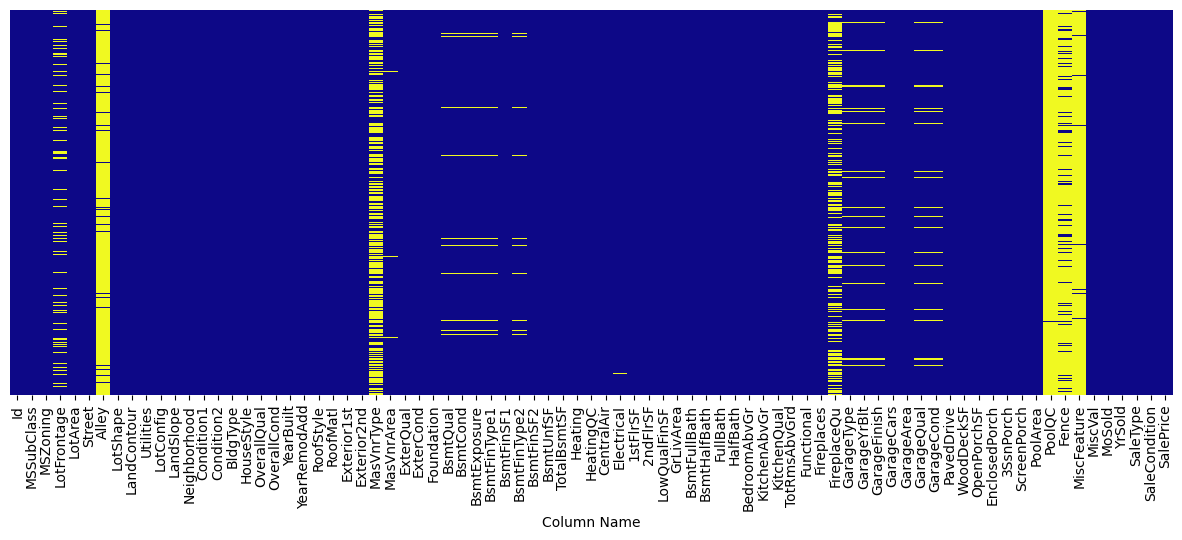

In [26]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap="plasma");

In [27]:
LotFrontage_median = train["LotFrontage"].median()
train["LotFrontage"] = train["LotFrontage"].fillna(LotFrontage_median)

train['MSSubClass'] = train['MSSubClass'].fillna("NA")

train["Electrical"] = train["Electrical"].fillna(train["Electrical"].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train['Utilities'] = train['Utilities'].fillna(train['Utilities'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])

train["Fence"] = train["Fence"].fillna("NA")
train["FireplaceQu"] = train["FireplaceQu"].fillna("NA")
train["PoolQC"] = train["PoolQC"].fillna("NA")
train["MiscFeature"] = train["MiscFeature"].fillna("NA")
train["Alley"] = train["Alley"].fillna("NA")
train["MasVnrType"] = train["MasVnrType"].fillna("NA")

train["Functional"] = train["Functional"].fillna("Typ")

train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train["GarageYrBlt"] = train["GarageYrBlt"].fillna(0)

garage_feature1 = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_feature1:
    train[column] = train[column].fillna("NA")
    
garage_feature2 = ['GarageYrBlt', 'GarageArea', 'GarageCars']
for column in garage_feature2:
    train[column] = train[column].fillna(0)

basement_feature1 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_feature1:
    train[column] = train[column].fillna("NA")

basement_feature2 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for column in basement_feature2:
    train[column] = train[column].fillna(0)


/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_1560/1772290950.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['MSSubClass'] = train['MSSubClass'].fillna("NA")


In [28]:
# Filling missing values for Test

LotFrontage_median = test["LotFrontage"].median()
test["LotFrontage"] = test["LotFrontage"].fillna(LotFrontage_median)

test['MSSubClass'] = test['MSSubClass'].fillna("NA")

test["Electrical"] = test["Electrical"].fillna(test["Electrical"].mode()[0])
test['Exterior1st'] = test['Exterior1st'].fillna(test['Exterior1st'].mode()[0])
test['Exterior2nd'] = test['Exterior2nd'].fillna(test['Exterior2nd'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['MSZoning'] = test['MSZoning'].fillna(test['MSZoning'].mode()[0])
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['SaleType'] = test['SaleType'].fillna(test['SaleType'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])

test["Fence"] = test["Fence"].fillna("NA")
test["FireplaceQu"] = test["FireplaceQu"].fillna("NA")
test["PoolQC"] = test["PoolQC"].fillna("NA")
test["MiscFeature"] = test["MiscFeature"].fillna("NA")
test["Alley"] = test["Alley"].fillna("NA")
test["MasVnrType"] = test["MasVnrType"].fillna("NA")

test["Functional"] = test["Functional"].fillna("Typ")

test["MasVnrArea"] = test["MasVnrArea"].fillna(0)
test["GarageYrBlt"] = test["GarageYrBlt"].fillna(0)

garage_feature1 = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_feature1:
    test[column] = test[column].fillna("NA")
    
garage_feature2 = ['GarageYrBlt', 'GarageArea', 'GarageCars']
for column in garage_feature2:
    test[column] = test[column].fillna(0)

basement_feature1 = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_feature1:
    test[column] = test[column].fillna("NA")

basement_feature2 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
for column in basement_feature2:
    test[column] = test[column].fillna(0)


/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_1560/778916066.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['MSSubClass'] = test['MSSubClass'].fillna("NA")


In [29]:
# Missing value check
train.isnull().sum().sum()

0

In [30]:
# Missing value check
test.isnull().sum().sum()

0

### Correlation


In [31]:
num_col = train.select_dtypes(include=['int64', 'float64'])
corr = num_col.corr()
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()


# Calculating the correlation between numerical columns.
corr = num_col.corr()

# Sorting and selecting the correlations with the 'SalePrice' column and choosing the top 15.
# We selected the top 15 because they are the most influential, meaning they have the highest correlations.
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:15].to_frame()

# Using background gradient to visualize the output with colors.
styled_corr = top_corr.style.background_gradient(axis=1, cmap=sns.light_palette('green', as_cmap=True))

styled_corr

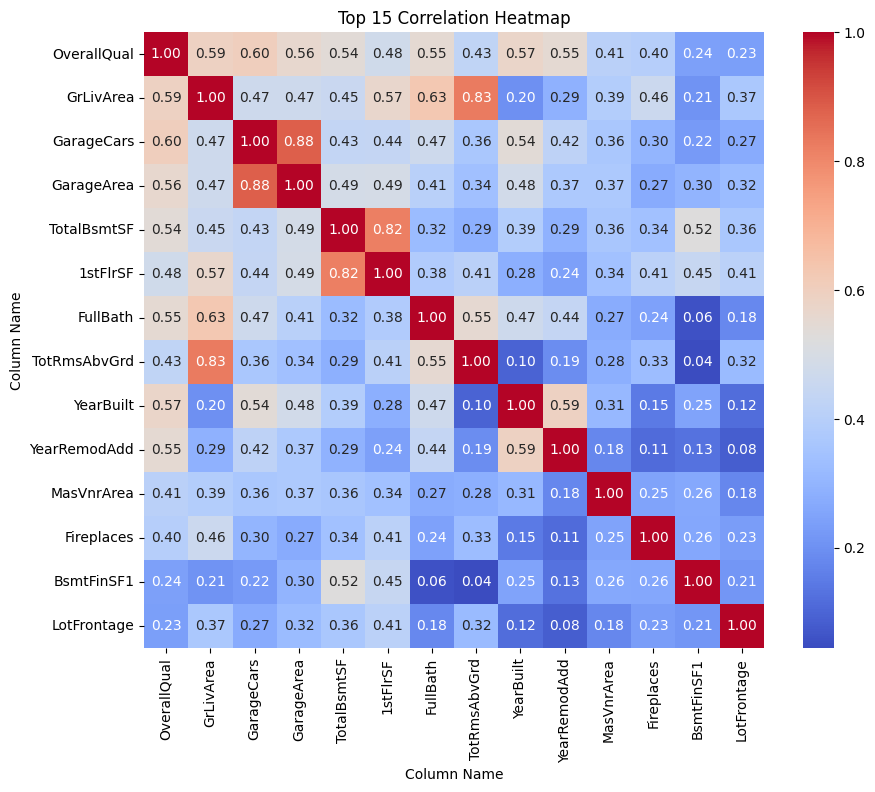

In [32]:
# Korelasyon matrisi
corr = num_col.corr()

# 'SalePrice' sütununa göre korelasyonları sırala ve en üst 15'i seç
top_corr = corr['SalePrice'].sort_values(ascending=False)[1:15]

# Sadece en üst 15 korelasyonu içeren bir alt veri çerçevesi oluştur
top_corr_df = corr.loc[top_corr.index, top_corr.index]

# Korelasyon matrisini ısı haritası olarak görselleştir
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_df, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top 15 Correlation Heatmap")
plt.show()

### Outlier  


Let's see our Continuous Numeric Variables

In [33]:
continuous_feature

['Id',
 'LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

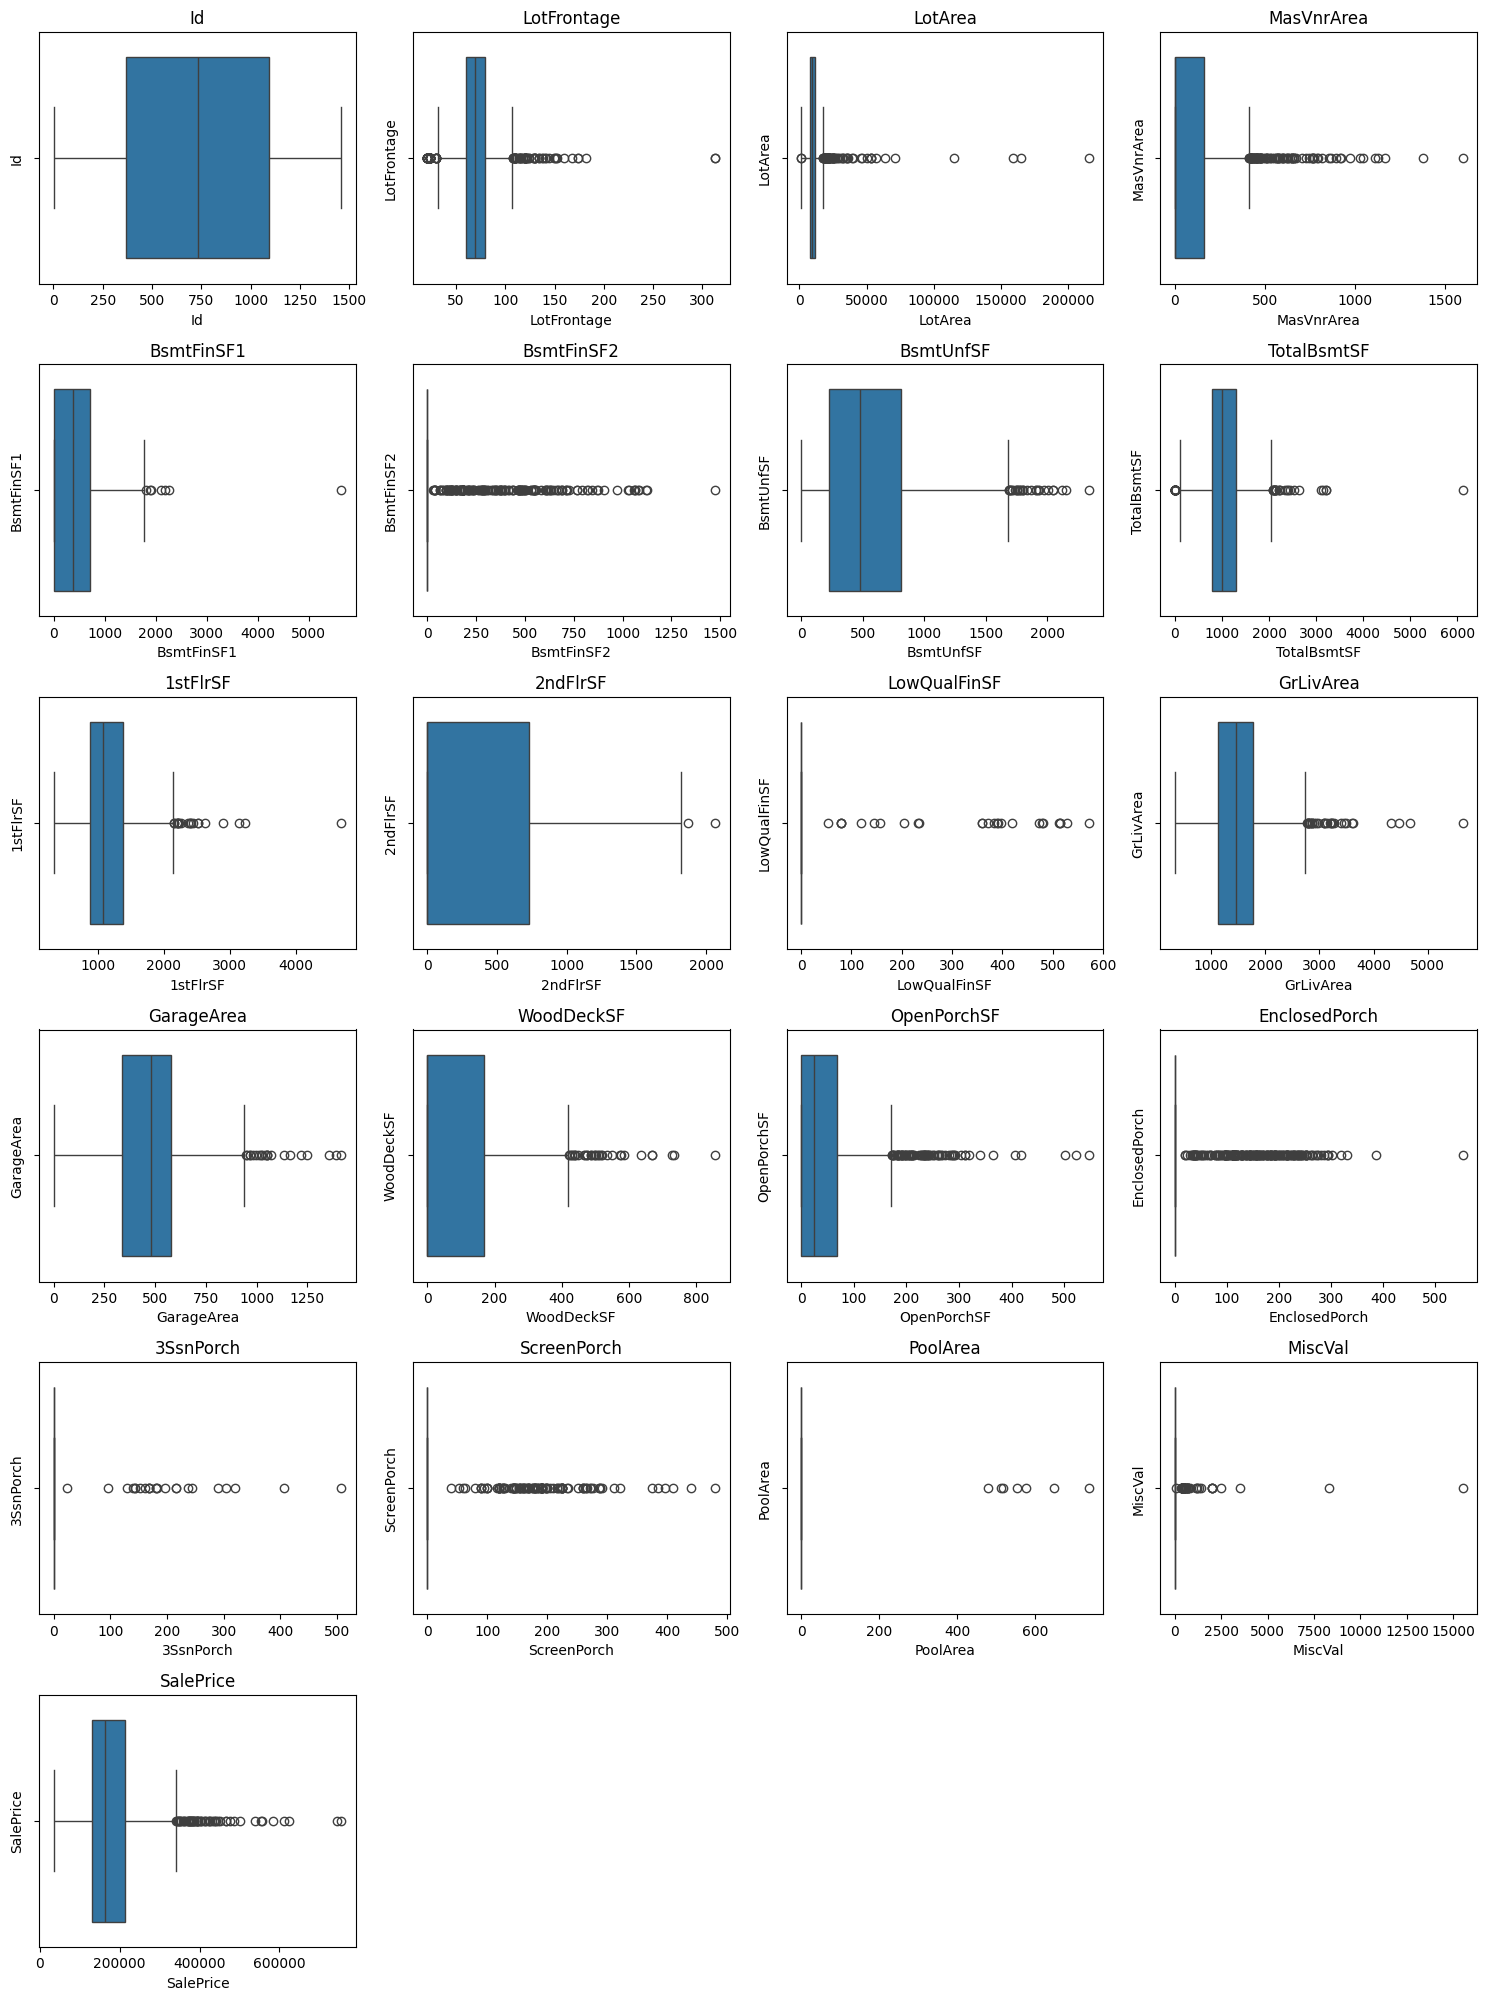

In [34]:
# Let's first observe the Outliers in them:
plt.rcParams["figure.figsize"] = (15, 23)

data = train.copy()
num_cols = len(continuous_feature)
num_rows = (num_cols + 2) // 3

for i, feature in enumerate(continuous_feature):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(data[feature], orient='h')
    plt.ylabel(feature)
    plt.title(feature)

plt.tight_layout()
plt.show()

In [35]:
# Let's suppress our Outliers to max and min

for column in continuous_feature:
    q1 = train[column].quantile(0.25)
    q3 = train[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    train[column] = train[column].apply(lambda x: lower_limit if x < lower_limit else x)
    train[column] = train[column].apply(lambda x: upper_limit if x > upper_limit else x)

train[continuous_feature].head()

Column Name  Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
0             1         65.0   8450.0       196.0       706.0         0.0   
1             2         80.0   9600.0         0.0       978.0         0.0   
2             3         68.0  11250.0       162.0       486.0         0.0   
3             4         60.0   9550.0         0.0       216.0         0.0   
4             5         84.0  14260.0       350.0       655.0         0.0   

Column Name  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0                150.0        856.0     856.0     854.0           0.0   
1                284.0       1262.0    1262.0       0.0           0.0   
2                434.0        920.0     920.0     866.0           0.0   
3                540.0        756.0     961.0     756.0           0.0   
4                490.0       1145.0    1145.0    1053.0           0.0   

Column Name  GrLivArea  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0               1710.0       548.0         0.0         61.0            0.0   
1               1262.0       460.0       298.0          0.0            0.0   
2               1786.0       608.0         0.0         42.0            0.0   
3               1717.0       642.0         0.0         35.0            0.0   
4               2198.0       836.0       192.0         84.0            0.0   

Column Name  3SsnPorch  ScreenPorch  PoolArea  MiscVal  SalePrice  
0                  0.0          0.0       0.0      0.0   208500.0  
1                  0.0          0.0       0.0      0.0   181500.0  
2                  0.0          0.0       0.0      0.0   223500.0  
3                  0.0          0.0       0.0      0.0   140000.0  
4                  0.0          0.0       0.0      0.0   250000.0

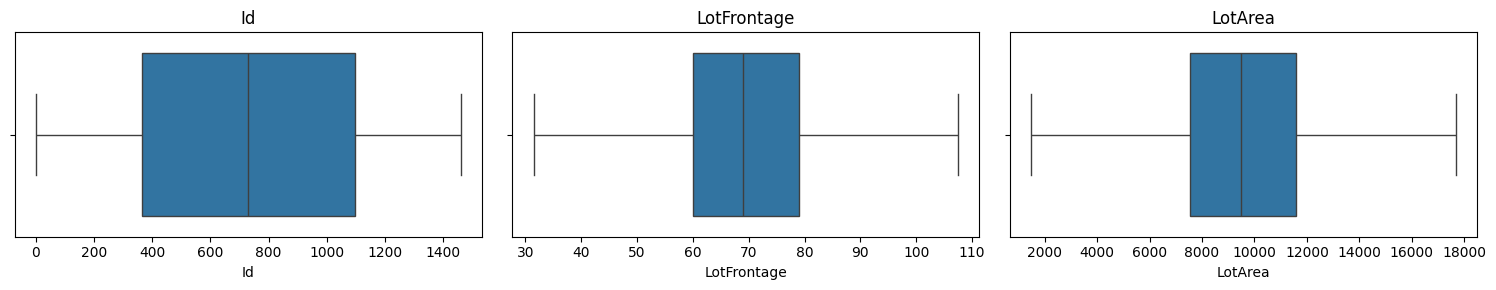

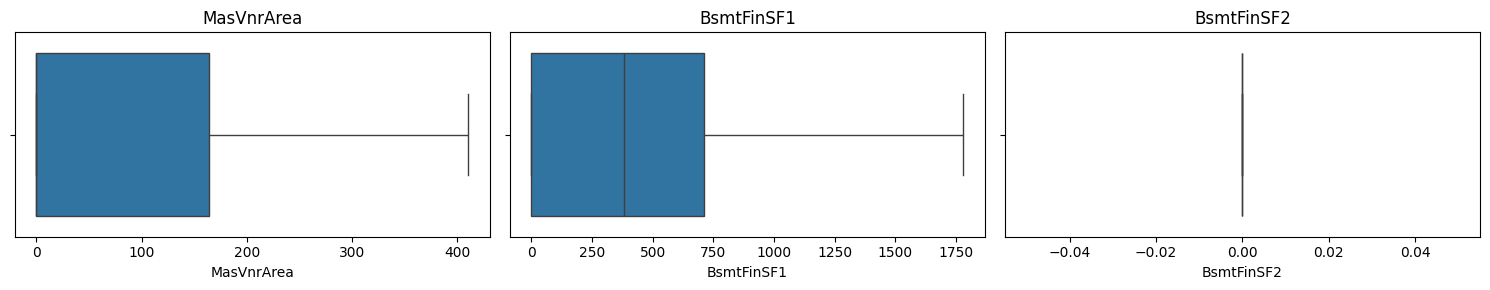

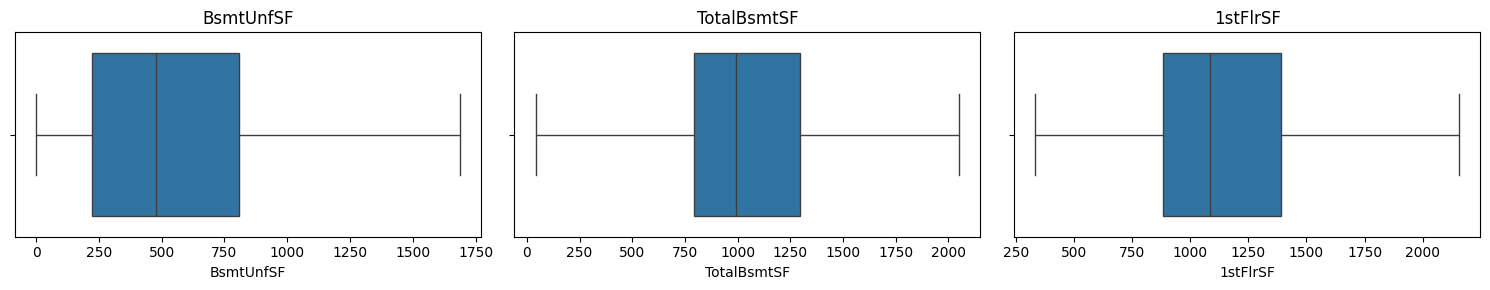

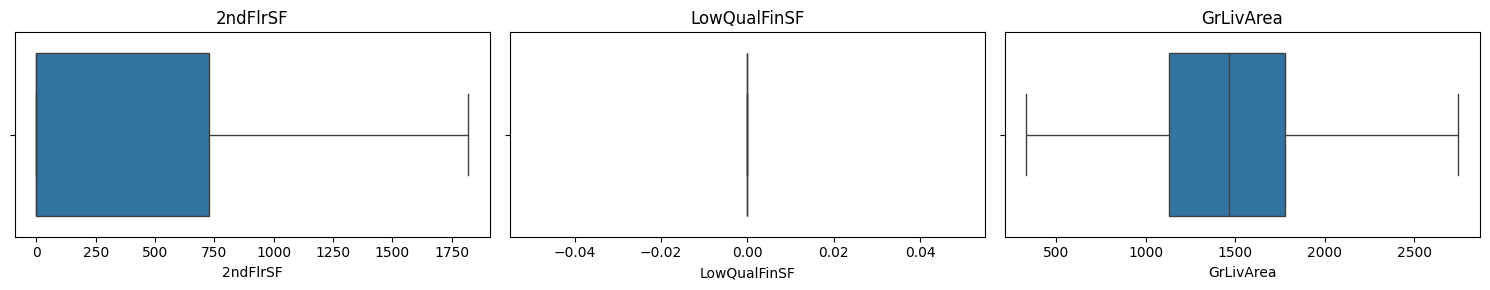

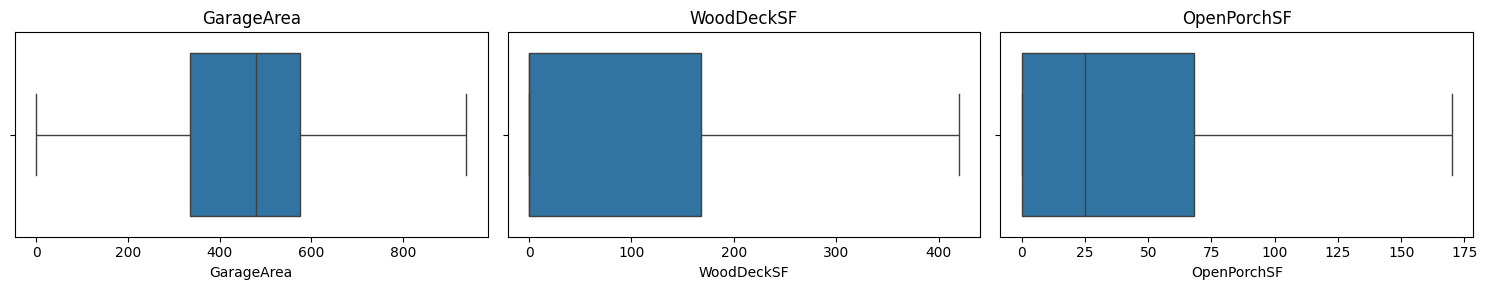

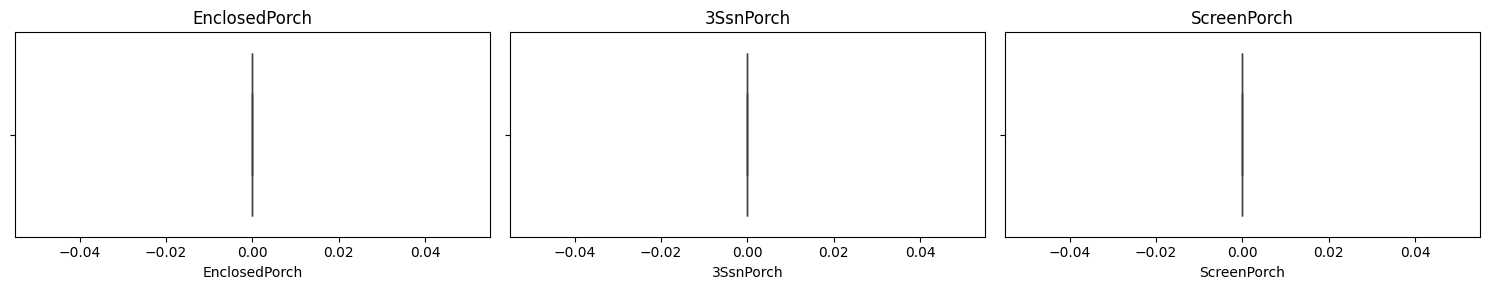

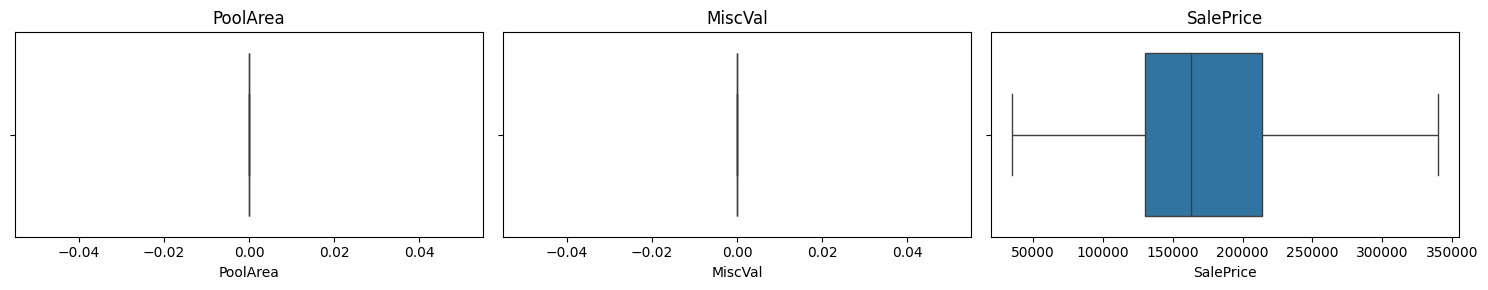

In [36]:
import seaborn as sns

total_continuous_features = len(continuous_feature)

for i in range(0, total_continuous_features, 3):
    plt.figure(figsize=(15, 3))  
    for j, feature in enumerate(continuous_feature[i:i+3]):
        plt.subplot(1, 3, j+1)  
        sns.boxplot(train[feature], orient='h')
        plt.xlabel(feature)
        plt.title(feature)
    plt.tight_layout()  
    plt.show()

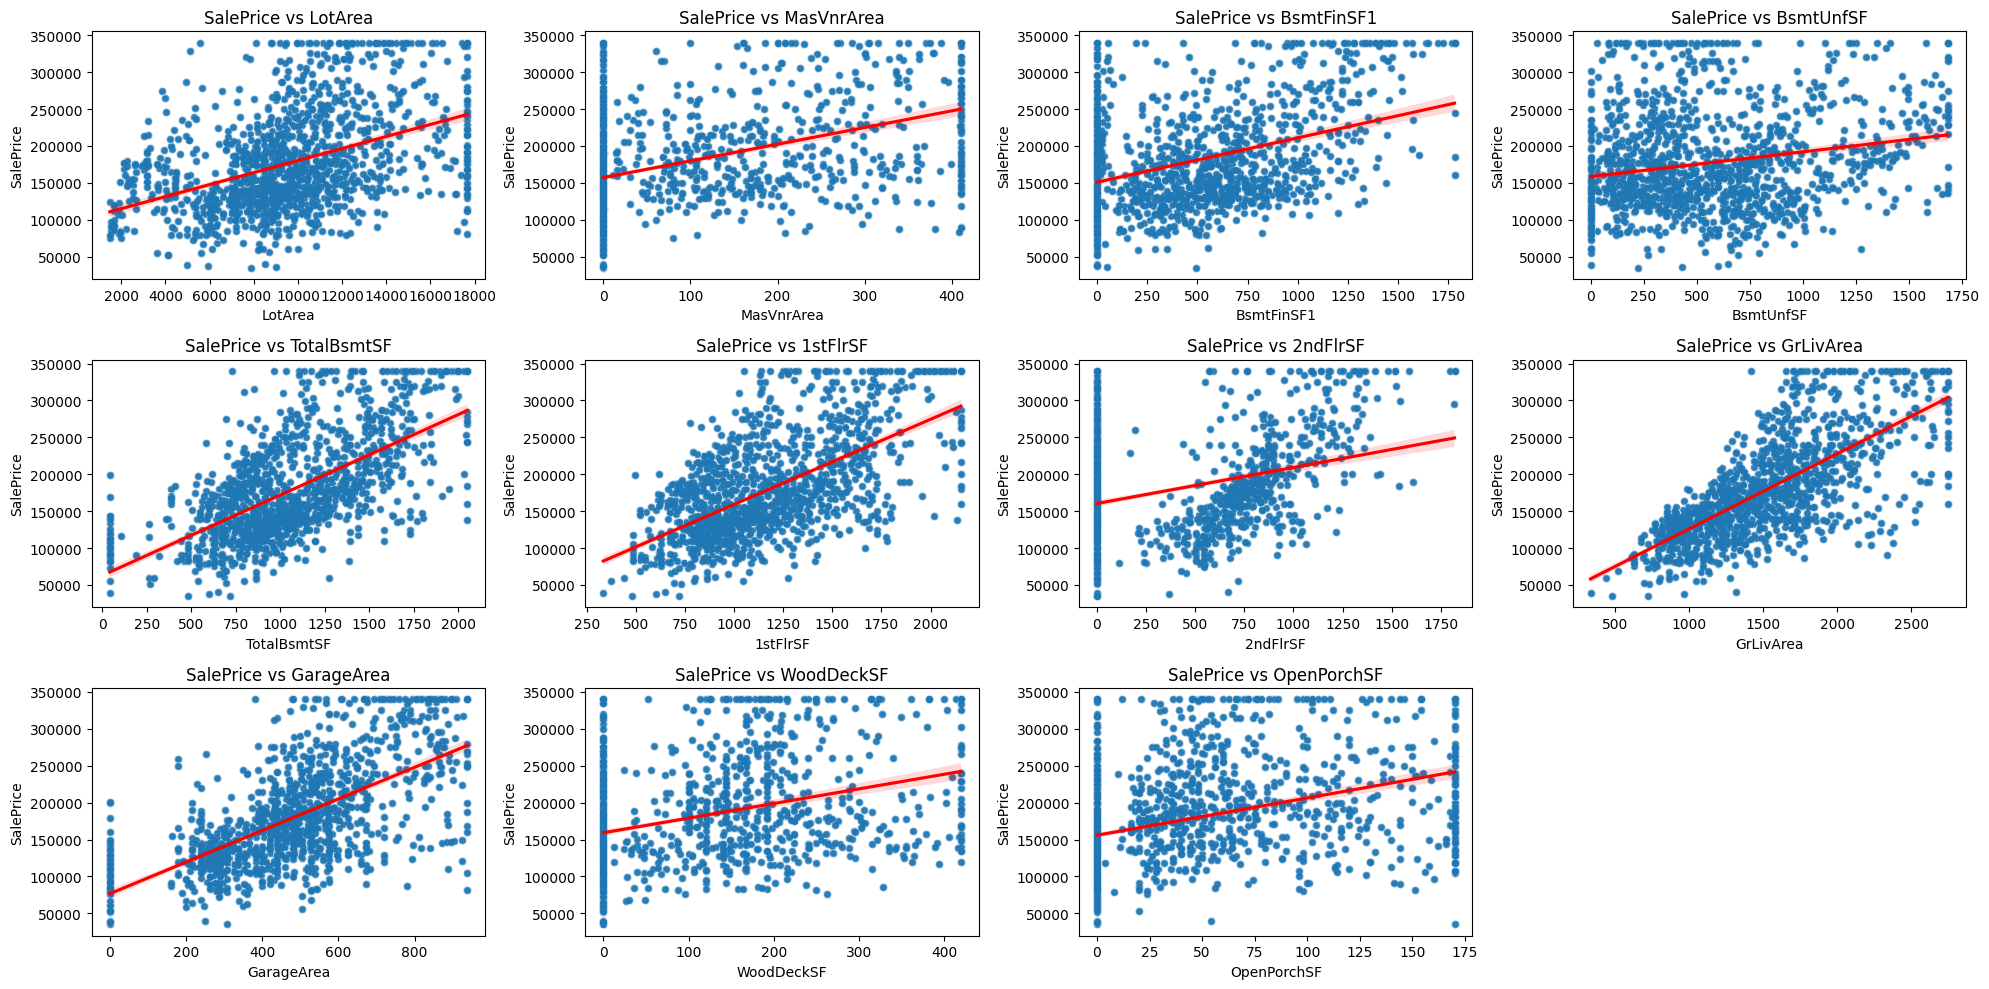

In [37]:
selected_features = ['LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
                     '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

plt.figure(figsize=(20, 10))

num_cols = 4
num_rows = len(selected_features) // num_cols
if len(selected_features) % num_cols != 0:
    num_rows += 1

for i, feature in enumerate(selected_features):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.scatterplot(data=train, x=feature, y='SalePrice', alpha=0.7)
    sns.regplot(data=train, x=feature, y='SalePrice', scatter_kws={'s': 10}, line_kws={'color': 'red'})
    plt.title('SalePrice vs {}'.format(feature))
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

plt.tight_layout()
plt.show()

In [38]:
# Let's suppress our Outliers to max and min for Test

for column in tcontinuous_feature:
    q1 = test[column].quantile(0.25)
    q3 = test[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    test[column] = test[column].apply(lambda x: lower_limit if x < lower_limit else x)
    test[column] = test[column].apply(lambda x: upper_limit if x > upper_limit else x)

test[tcontinuous_feature].head()

Id  LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0  1461         80.0  11622.0         0.0       468.0         0.0      270.0   
1  1462         81.0  14267.0       108.0       923.0         0.0      406.0   
2  1463         74.0  13830.0         0.0       791.0         0.0      137.0   
3  1464         78.0   9978.0        20.0       602.0         0.0      324.0   
4  1465         43.0   5005.0         0.0       263.0         0.0     1017.0   

   TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  GarageArea  \
0        882.0     896.0       0.0           0.0      896.0       730.0   
1       1329.0    1329.0       0.0           0.0     1329.0       312.0   
2        928.0     928.0     701.0           0.0     1629.0       482.0   
3        926.0     926.0     678.0           0.0     1604.0       470.0   
4       1280.0    1280.0       0.0           0.0     1280.0       506.0   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0       140.0          0.0            0.0        0.0          0.0       0.0   
1       393.0         36.0            0.0        0.0          0.0       0.0   
2       212.0         34.0            0.0        0.0          0.0       0.0   
3       360.0         36.0            0.0        0.0          0.0       0.0   
4         0.0         82.0            0.0        0.0          0.0       0.0   

   MiscVal  
0      0.0  
1      0.0  
2      0.0  
3      0.0  
4      0.0

### Skewness  

Mu - Average, Sigma - Standard Deviation

 mu = 177331.53 and sigma = 67182.82



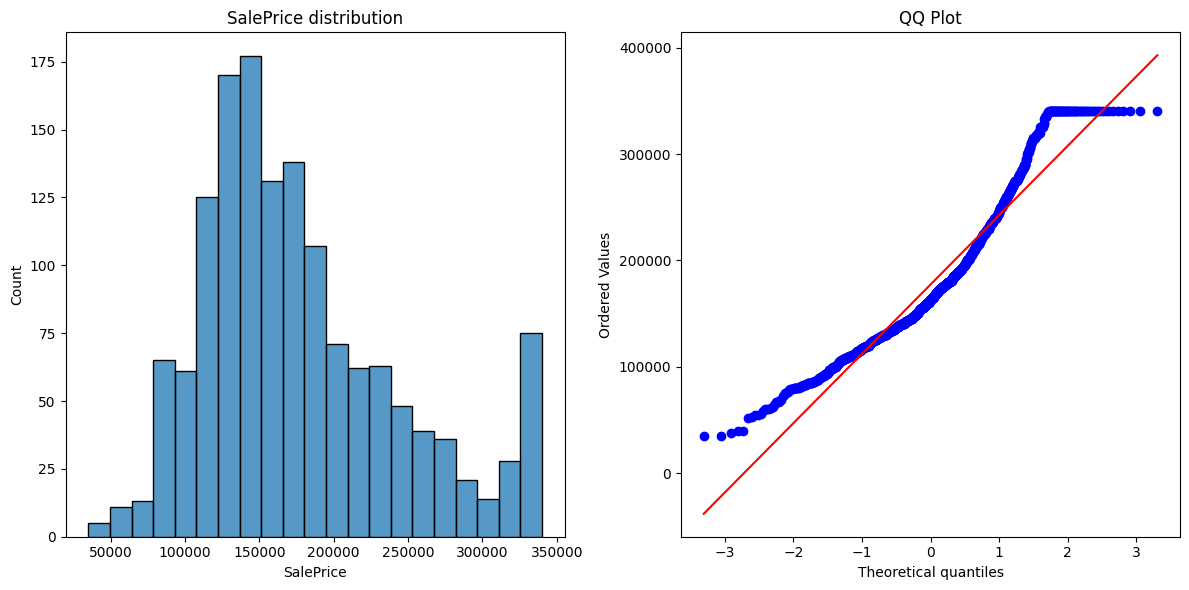

Mu - Average, Sigma - Standard Deviation


In [39]:
print("Mu - Average, Sigma - Standard Deviation")

# Get the suitable parameters for distribution
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Create a new figure with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting histogram on the first subplot
sns.histplot(train['SalePrice'], kde_kws={'fit': norm}, ax=axs[0])
axs[0].set_title('SalePrice distribution')

# Plotting QQ-plot on the second subplot
probplot(train['SalePrice'], plot=axs[1])
axs[1].set_title('QQ Plot')

plt.tight_layout() 
plt.show()

print("Mu - Average, Sigma - Standard Deviation")

Mu - Average, Sigma - Standard Deviation

 mu = 12.02 and sigma = 0.38



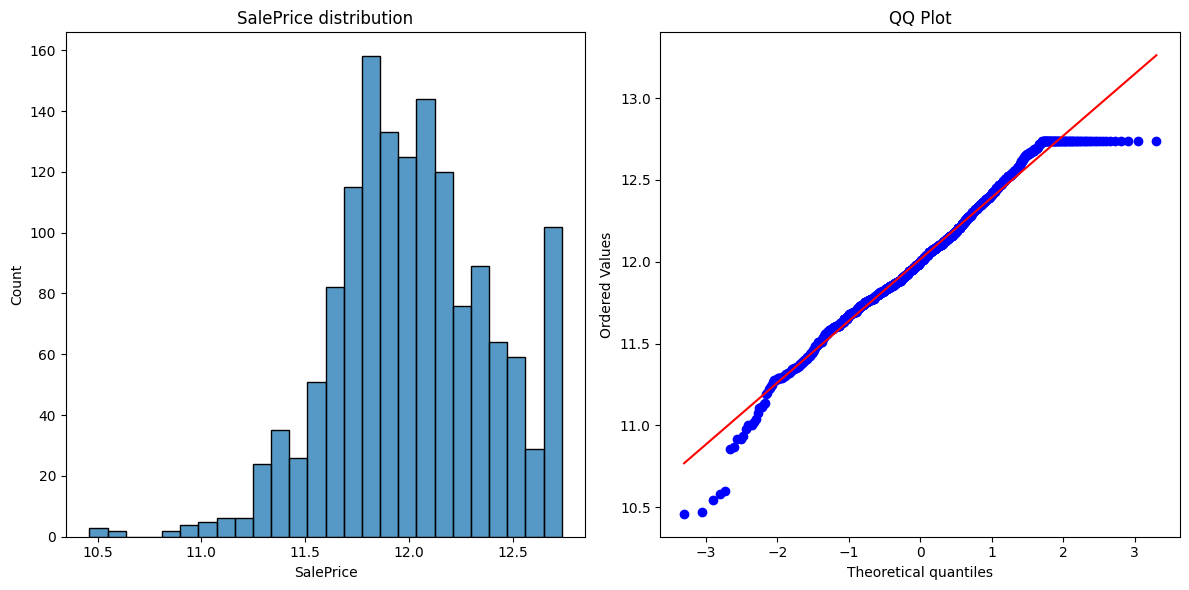

Mu - Average, Sigma - Standard Deviation


In [40]:
print("Mu - Average, Sigma - Standard Deviation")

# Apply log transformation to SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])

# Get the suitable parameters for distribution
(mu, sigma) = norm.fit(train['SalePrice'])
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Create a new figure with one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting histogram on the first subplot
sns.histplot(train['SalePrice'], kde_kws={'fit': norm}, ax=axs[0])
axs[0].set_title('SalePrice distribution')

# Plotting QQ-plot on the second subplot
probplot(train['SalePrice'], plot=axs[1])
axs[1].set_title('QQ Plot')

plt.tight_layout()  
plt.show()

print("Mu - Average, Sigma - Standard Deviation")

### Encoding



In [41]:
len(categorical_feature)

44

In [42]:
train[categorical_feature].head()

Column Name  MSSubClass MSZoning Street Alley LotShape LandContour Utilities  \
0                    60       RL   Pave    NA      Reg         Lvl    AllPub   
1                    20       RL   Pave    NA      Reg         Lvl    AllPub   
2                    60       RL   Pave    NA      IR1         Lvl    AllPub   
3                    70       RL   Pave    NA      IR1         Lvl    AllPub   
4                    60       RL   Pave    NA      IR1         Lvl    AllPub   

Column Name LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0              Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1                 FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2              Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3              Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4                 FR2       Gtl      NoRidge       Norm       Norm     1Fam   

Column Name HouseStyle RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0               2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1               1Story     Gable  CompShg     MetalSd     MetalSd         NA   
2               2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3               2Story     Gable  CompShg     Wd Sdng     Wd Shng         NA   
4               2Story     Gable  CompShg     VinylSd     VinylSd    BrkFace   

Column Name ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0                  Gd        TA      PConc       Gd       TA           No   
1                  TA        TA     CBlock       Gd       TA           Gd   
2                  Gd        TA      PConc       Gd       TA           Mn   
3                  TA        TA     BrkTil       TA       Gd           No   
4                  Gd        TA      PConc       Gd       TA           Av   

Column Name BsmtFinType1 BsmtFinType2 Heating HeatingQC CentralAir Electrical  \
0                    GLQ          Unf    GasA        Ex          Y      SBrkr   
1                    ALQ          Unf    GasA        Ex          Y      SBrkr   
2                    GLQ          Unf    GasA        Ex          Y      SBrkr   
3                    ALQ          Unf    GasA        Gd          Y      SBrkr   
4                    GLQ          Unf    GasA        Ex          Y      SBrkr   

Column Name KitchenQual Functional FireplaceQu GarageType GarageFinish  \
0                    Gd        Typ          NA     Attchd          RFn   
1                    TA        Typ          TA     Attchd          RFn   
2                    Gd        Typ          TA     Attchd          RFn   
3                    Gd        Typ          Gd     Detchd          Unf   
4                    Gd        Typ          TA     Attchd          RFn   

Column Name GarageQual GarageCond PavedDrive PoolQC Fence MiscFeature  \
0                   TA         TA          Y     NA    NA          NA   
1                   TA         TA          Y     NA    NA          NA   
2                   TA         TA          Y     NA    NA          NA   
3                   TA         TA          Y     NA    NA          NA   
4                   TA         TA          Y     NA    NA          NA   

Column Name SaleType SaleCondition  
0                 WD        Normal  
1                 WD        Normal  
2                 WD        Normal  
3                 WD       Abnorml  
4                 WD        Normal

In [43]:
# One Hot Encoding
train = pd.get_dummies(train, drop_first=True, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
train.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0   1          60       RL         65.0   8450.0    NA      Reg         Lvl   
1   2          20       RL         80.0   9600.0    NA      Reg         Lvl   
2   3          60       RL         68.0  11250.0    NA      IR1         Lvl   
3   4          70       RL         60.0   9550.0    NA      IR1         Lvl   
4   5          60       RL         84.0  14260.0    NA      IR1         Lvl   

  Utilities LotConfig Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    AllPub    Inside      CollgCr       Norm       Norm     1Fam     2Story   
1    AllPub       FR2      Veenker      Feedr       Norm     1Fam     1Story   
2    AllPub    Inside      CollgCr       Norm       Norm     1Fam     2Story   
3    AllPub    Corner      Crawfor       Norm       Norm     1Fam     2Story   
4    AllPub       FR2      NoRidge       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   
3            7            5       1915          1970     Gable  CompShg   
4            8            5       2000          2000     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd         NA         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3     Wd Sdng     Wd Shng         NA         0.0        TA        TA   
4     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ       706.0   
1     CBlock       Gd       TA           Gd          ALQ       978.0   
2      PConc       Gd       TA           Mn          GLQ       486.0   
3     BrkTil       TA       Gd           No          ALQ       216.0   
4      PConc       Gd       TA           Av          GLQ       655.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf         0.0      150.0        856.0    GasA        Ex   
1          Unf         0.0      284.0       1262.0    GasA        Ex   
2          Unf         0.0      434.0        920.0    GasA        Ex   
3          Unf         0.0      540.0        756.0    GasA        Gd   
4          Unf         0.0      490.0       1145.0    GasA        Ex   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr     856.0     854.0           0.0     1710.0             1   
1      SBrkr    1262.0       0.0           0.0     1262.0             0   
2      SBrkr     920.0     866.0           0.0     1786.0             1   
3      SBrkr     961.0     756.0           0.0     1717.0             1   
4      SBrkr    1145.0    1053.0           0.0     2198.0             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0          NA     Attchd       2003.0   
1             6        Typ           1          TA     Attchd       1976.0   
2             6        Typ           1          TA     Attchd       2001.0   
3             7        Typ           1          Gd     Detc

In [44]:
# Ordinal Encoding
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    train[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_1560/2823904214.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_1560/2823904214.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('fut

In [45]:
# Target Encoding
for col in ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley',
                  'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' ,
                  'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType',
                  'MasVnrType','Foundation','Heating','MiscFeature']:
    # print(col, train.groupby([col])['SalePrice'].mean().sort_values())
    ordinal_labels = train.groupby([col])['SalePrice'].mean().sort_values().index
    ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
    train[col]=train[col].map(ordinal_labels2)

In [46]:
train.head()

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0   1          15         4         65.0   8450.0      3         1   
1   2          12         4         80.0   9600.0      3         1   
2   3          15         4         68.0  11250.0      3         2   
3   4          10         4         60.0   9550.0      3         2   
4   5          15         4         84.0  14260.0      3         2   

   LandContour  Utilities  LotConfig  Neighborhood  Condition1  Condition2  \
0            2          2          1            16           4           5   
1            2          2          3            21           2           5   
2            2          2          1            16           4           5   
3            2          2          2            18           4           5   
4            2          2          3            25           4           5   

   BldgType  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
0         4           8            7            5       2003          2003   
1         4           5            6            8       1976          1976   
2         4           8            7            5       2001          2002   
3         4           8            7            5       1915          1970   
4         4           8            8            5       2000          2000   

   RoofStyle  RoofMatl  Exterior1st  Exterior2nd  MasVnrType  MasVnrArea  \
0          2         3           13           15           3       196.0   
1          2         3            7            7           2         0.0   
2          2         3           13           15           3       162.0   
3          2         3            5            8           2         0.0   
4          2         3           13           15           3       350.0   

   ExterQual  ExterCond  Foundation  BsmtQual  BsmtCond  BsmtExposure  \
0          4          3           6         4         3             2   
1          3          3           3         4         3             5   
2          4          3           6         4         3             3   
3          3          3           2         3         4             2   
4          4          3           6         4         3             4   

   BsmtFinType1  BsmtFinSF1  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0             7       706.0             6         0.0      150.0        856.0   
1             5       978.0             6         0.0      284.0       1262.0   
2             7       486.0             6         0.0      434.0        920.0   
3             5       216.0             6         0.0      540.0        756.0   
4             7       655.0             6         0.0      490.0       1145.0   

   Heating  HeatingQC  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        6          5           5     856.0     854.0           0.0   
1        6          5           5    1262.0       0.0           0.0   
2        6          5           5     920.0     866.0           0.0   
3        6          4           5     961.0     756.0           0.0   
4        6          5           5    1145.0    1053.0           0.0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0     1710.0             1             0         2         1             3   
1     1262.0             0             1         2         0             3   
2     1786.0             1             0         2         1             3   
3     1717.0             1             0         1         0             3   
4     2198.0             1             0         2         1             4   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            4             8           7           0   
1             1            3             6           7           1   
2             1            4             6           7           1   
3             1            4             7           7           1   
4             1

In [47]:
print(train.shape)

(1460, 83)


In [48]:
len(tcategorical_feature)

44

In [49]:
test[tcategorical_feature].head()

MSSubClass MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
0          20       RH   Pave    NA      Reg         Lvl    AllPub    Inside   
1          20       RL   Pave    NA      IR1         Lvl    AllPub    Corner   
2          60       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
3          60       RL   Pave    NA      IR1         Lvl    AllPub    Inside   
4         120       RL   Pave    NA      IR1         HLS    AllPub    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle RoofStyle  \
0       Gtl        NAmes      Feedr       Norm     1Fam     1Story     Gable   
1       Gtl        NAmes       Norm       Norm     1Fam     1Story       Hip   
2       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable   
3       Gtl      Gilbert       Norm       Norm     1Fam     2Story     Gable   
4       Gtl      StoneBr       Norm       Norm   TwnhsE     1Story     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond Foundation  \
0  CompShg     VinylSd     VinylSd         NA        TA        TA     CBlock   
1  CompShg     Wd Sdng     Wd Sdng    BrkFace        TA        TA     CBlock   
2  CompShg     VinylSd     VinylSd         NA        TA        TA      PConc   
3  CompShg     VinylSd     VinylSd    BrkFace        TA        TA      PConc   
4  CompShg     HdBoard     HdBoard         NA        Gd        TA      PConc   

  BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 Heating HeatingQC  \
0       TA       TA           No          Rec          LwQ    GasA        TA   
1       TA       TA           No          ALQ          Unf    GasA        TA   
2       Gd       TA           No          GLQ          Unf    GasA        Gd   
3       TA       TA           No          GLQ          Unf    GasA        Ex   
4       Gd       TA           No          ALQ          Unf    GasA        Ex   

  CentralAir Electrical KitchenQual Functional FireplaceQu GarageType  \
0          Y      SBrkr          TA        Typ          NA     Attchd   
1          Y      SBrkr          Gd        Typ          NA     Attchd   
2          Y      SBrkr          TA        Typ          TA     Attchd   
3          Y      SBrkr          Gd        Typ          Gd     Attchd   
4          Y      SBrkr          Gd        Typ          NA     Attchd   

  GarageFinish GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature  \
0          Unf         TA         TA          Y     NA  MnPrv          NA   
1          Unf         TA         TA          Y     NA     NA        Gar2   
2          Fin         TA         TA          Y     NA  MnPrv          NA   
3          Fin         TA         TA          Y     NA     NA          NA   
4          RFn         TA         TA          Y     NA     NA          NA   

  SaleType SaleCondition  
0       WD        Normal  
1       WD        Normal  
2       WD        Normal  
3       WD        Normal  
4       WD        Normal

In [50]:
# One Hot Encoding
test = pd.get_dummies(test, drop_first=True, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])
test.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Alley LotShape LandContour  \
0  1461          20       RH         80.0  11622.0    NA      Reg         Lvl   
1  1462          20       RL         81.0  14267.0    NA      IR1         Lvl   
2  1463          60       RL         74.0  13830.0    NA      IR1         Lvl   
3  1464          60       RL         78.0   9978.0    NA      IR1         Lvl   
4  1465         120       RL         43.0   5005.0    NA      IR1         HLS   

  Utilities LotConfig Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    AllPub    Inside        NAmes      Feedr       Norm     1Fam     1Story   
1    AllPub    Corner        NAmes       Norm       Norm     1Fam     1Story   
2    AllPub    Inside      Gilbert       Norm       Norm     1Fam     2Story   
3    AllPub    Inside      Gilbert       Norm       Norm     1Fam     2Story   
4    AllPub    Inside      StoneBr       Norm       Norm   TwnhsE     1Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            5            6       1961          1961     Gable  CompShg   
1            6            6       1958          1958       Hip  CompShg   
2            5            5       1997          1998     Gable  CompShg   
3            6            6       1998          1998     Gable  CompShg   
4            8            5       1992          1992     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd         NA         0.0        TA        TA   
1     Wd Sdng     Wd Sdng    BrkFace       108.0        TA        TA   
2     VinylSd     VinylSd         NA         0.0        TA        TA   
3     VinylSd     VinylSd    BrkFace        20.0        TA        TA   
4     HdBoard     HdBoard         NA         0.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0     CBlock       TA       TA           No          Rec       468.0   
1     CBlock       TA       TA           No          ALQ       923.0   
2      PConc       Gd       TA           No          GLQ       791.0   
3      PConc       TA       TA           No          GLQ       602.0   
4      PConc       Gd       TA           No          ALQ       263.0   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          LwQ         0.0      270.0        882.0    GasA        TA   
1          Unf         0.0      406.0       1329.0    GasA        TA   
2          Unf         0.0      137.0        928.0    GasA        Gd   
3          Unf         0.0      324.0        926.0    GasA        Ex   
4          Unf         0.0     1017.0       1280.0    GasA        Ex   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr     896.0       0.0           0.0      896.0           0.0   
1      SBrkr    1329.0       0.0           0.0     1329.0           0.0   
2      SBrkr     928.0     701.0           0.0     1629.0           0.0   
3      SBrkr     926.0     678.0           0.0     1604.0           0.0   
4      SBrkr    1280.0       0.0           0.0     1280.0           0.0   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0           0.0         1         0             2             1          TA   
1           0.0         1         1             3             1          Gd   
2           0.0         2         1             3             1          TA   
3           0.0         2         1             3             1          Gd   
4           0.0         2         0             2             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt  \
0             5        Typ           0          NA     Attchd       1961.0   
1             6        Typ           0          NA     Attchd       1958.0   
2             6        Typ           1          TA     Attchd       1997.0   
3             7        Typ           1          G

In [51]:
# Ordinal Encoding
for col in ['GarageQual', 'GarageCond', 'ExterQual','ExterCond','HeatingQC','KitchenQual', 'PoolQC', 'BsmtQual','BsmtCond', 'FireplaceQu']:
    test[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_1560/4021223329.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].replace({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)
/var/folders/35/99j3bpln2nsbgqgvg3mtzfxm0000gn/T/ipykernel_1560/4021223329.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('futu

In [52]:
# Target Encoding
for col in ['BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass','MSZoning','LotConfig','Neighborhood', 'Condition1', 'Alley', 'Condition2', 'GarageType','Functional','SaleCondition','SaleType','Electrical' ,'HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd', 'BldgType', 'MasVnrType','Foundation','Heating','MiscFeature']:
    ordinal_labels = train.groupby([col])['SalePrice'].mean().sort_values().index
    ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
    test[col] = test[col].map(ordinal_labels2)

In [56]:
train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Alley  LotShape  \
0        1          15         4         65.0   8450.0      3         1   
1        2          12         4         80.0   9600.0      3         1   
2        3          15         4         68.0  11250.0      3         2   
3        4          10         4         60.0   9550.0      3         2   
4        5          15         4         84.0  14260.0      3         2   
5        6           7         4         85.0  14115.0      3         2   
6        7          12         4         75.0  10084.0      3         1   
7        8          15         4         69.0  10382.0      3         2   
8        9           7         2         51.0   6120.0      3         1   
9       10           4         4         50.0   7420.0      3         1   
10      11          12         4         70.0  11200.0      3         1   
11      12          15         4         85.0  11924.0      3         2   
12      13          12         4         69.0  12968.0      3         4   
13      14          12         4         91.0  10652.0      3         2   
14      15          12         4         69.0  10920.0      3         2   
15      16           3         2         51.0   6120.0      3         1   
16      17          12         4         69.0  11241.0      3         2   
17      18           5         4         72.0  10791.0      3         1   
18      19          12         4         66.0  13695.0      3         1   
19      20          12         4         70.0   7560.0      3         1   
20      21          15         4        101.0  14215.0      3         2   
21      22           3         2         57.0   7449.0      1         1   
22      23          12         4         75.0   9742.0      3         1   
23      24          14         2         44.0   4224.0      3         1   
24      25          12         4         69.0   8246.0      3         2   
25      26          12         4        107.5  14230.0      3         1   
26      27          12         4         60.0   7200.0      3         1   
27      28          12         4         98.0  11478.0      3         1   
28      29          12         4         47.0  16321.0      3         2   
29      30           1         2         60.0   6324.0      3         2   
30      31          10         1         50.0   8500.0      2         1   
31      32          12         4         69.0   8544.0      3         2   
32      33          12         4         85.0  11049.0      3         1   
33      34          12         4         70.0  10552.0      3         2   
34      35          14         4         60.0   7313.0      3         1   
35      36          15         4        107.5  13418.0      3         1   
36      37          12         4        107.5  10859.0      3         1   
37      38          12         4         74.0   8532.0      3         1   
38      39          12         4         68.0   7922.0      3         1   
39      40           5         4         65.0   6040.0      3         1   
40      41          12         4         84.0   8658.0      3         1   
41      42          12         4        107.5  16905.0      3         1   
42      43           9         4         69.0   9180.0      3         2   
43      44          12         4         69.0   9200.0      3         2   
44      45          12         4         70.0   7945.0      3         1   
45      46          14         4         61.0   7658.0      3         1   
46      47           7         4         48.0  12822.0      3         2   
47      48          12         5         84.0  11096.0      3         1   
48      49           4         2         33.0   4456.0      3         1   
49      50          12         4         66.0   7742.0      3         1   
50      51          15         4         69.0  13869.0      3         4   
51      52           7         2         52.0   6240.0      3         1   
52      53           5         2 

/opt/miniconda3/envs/my_ai/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/my_ai/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 67.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/miniconda3/envs/my_ai/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


/opt/miniconda3/envs/my_ai/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


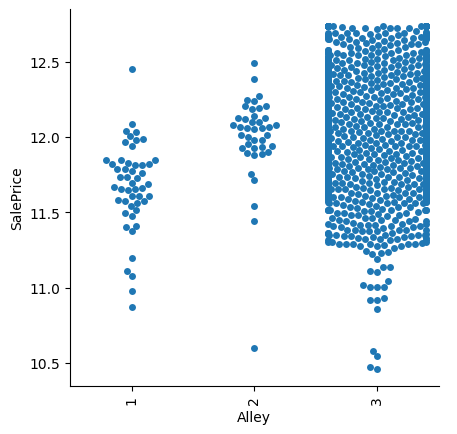

In [58]:
cat_plot = sns.catplot(y="SalePrice", x='Alley', kind="swarm", legend="full", data=train, height=4.5, aspect=3 / 3,);
cat_plot.set_xticklabels(rotation=90)

In [53]:
'''ntrain = train.shape[0]
y_train = train.SalePrice.values

all_data = pd.concat((train, test))

all_data.drop(['SalePrice'], axis=1, inplace=True)

print("all_data size is: {}".format(all_data.shape))'''

'ntrain = train.shape[0]\ny_train = train.SalePrice.values\n\nall_data = pd.concat((train, test))\n\nall_data.drop([\'SalePrice\'], axis=1, inplace=True)\n\nprint("all_data size is: {}".format(all_data.shape))'

In [54]:
'''

train = all_data[:ntrain]
test = all_data[ntrain:]
all_data['salePrice']

'''

"\n\ntrain = all_data[:ntrain]\ntest = all_data[ntrain:]\nall_data['salePrice']\n\n"